<a href="https://colab.research.google.com/github/drhpl1/dataset/blob/main/Klasifikasi_Kelompok_cyber_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, kita akan mengimpor library atau modul yang diperlukan dalam proses pembangunan model prediksi. Dengan mengimpor library-library ini, kita dapat menggunakan fungsi-fungsi yang diperlukan untuk pra-pemrosesan data, pembangunan model, dan evaluasi model prediksi.

In [ ]:
# Impor pustaka yang diperlukan untuk operasi numerik
import numpy as np  # Import numpy untuk operasi numerik seperti manipulasi array

# Impor pustaka yang diperlukan untuk pemrosesan data dan pembangunan model
# Import pandas untuk manipulasi dan analisis data
import pandas as pd

# Import TensorFlow untuk pemrosesan jaringan saraf dan deep learning
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

# Import LabelEncoder dari scikit-learn untuk mengkodekan variabel kategori
from sklearn.preprocessing import LabelEncoder

# Import StandardScaler dari scikit-learn untuk standarisasi data
from sklearn.preprocessing import StandardScaler

# Import train_test_split dari scikit-learn untuk memisahkan data menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Import Sequential dan Dense dari Keras untuk membangun model jaringan saraf tiruan (neural network)
from keras.models import Sequential
from keras.layers import Dense

# Import matplotlib.pyplot sebagai plt untuk membuat visualisasi data
import matplotlib.pyplot as plt

# Import berbagai metrik evaluasi dari scikit-learn untuk mengukur kinerja model
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

# Import RandomForestRegressor dari scikit-learn untuk membangun model Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import Support Vector Regressor (SVR) dari scikit-learn untuk membangun model SVR
from sklearn.svm import SVR


# **2. Menampilkan Dataset**

Menampilkan dataset yang akan digunakan untuk pembangunan model prediksi. Dataset ini dapat berupa data yang sudah ada atau yang telah dikumpulkan sebelumnya, dan perlu dipahami struktur dan karakteristiknya sebelum memprosesnya.

In [ ]:

# URL raw dari file CSV di GitHub
url = "https://github.com/drhpl1/dataset/raw/main/Data_Tanaman_Padi_Sumatera_version_1.csv"  # Gantilah 'nama_file.csv' dengan nama file yang sesuai

# Membaca data dari URL raw dengan pemisah titik koma
df = pd.read_csv(url)
df

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


#**3. Exploratory Data Analysis (EDA)**

Dalam tahap ini, kita akan melakukan Exploratory Data Analysis (EDA) pada dataset. EDA adalah proses untuk memahami lebih dalam tentang dataset yang kita miliki.

##**Katagori Distribusi**

Pada bagian ini, kita akan melihat sebaran jumlah sampel data di setiap kategori kelas yang akan diprediksi.

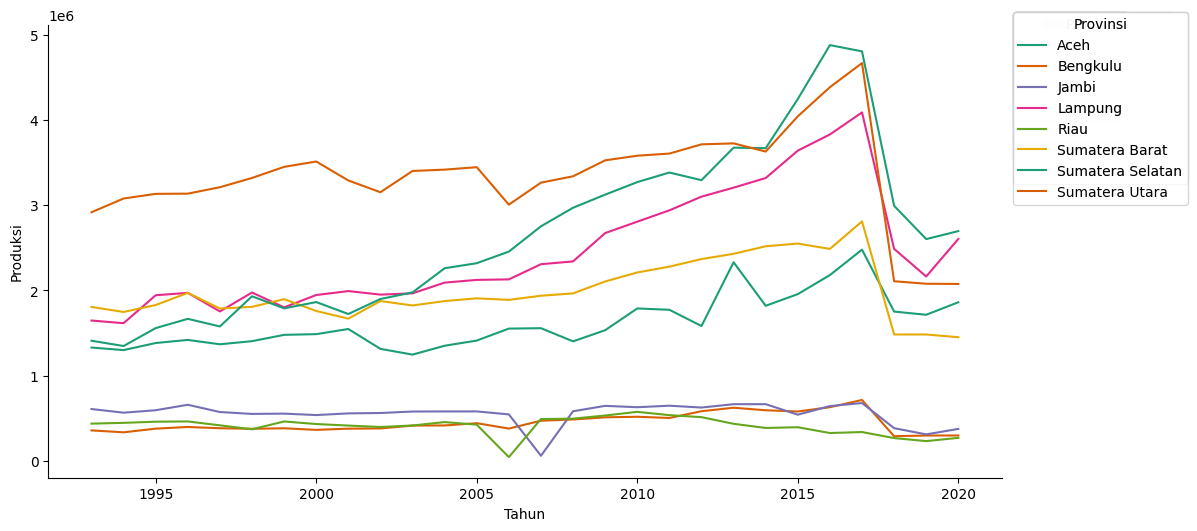

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tahun']
  ys = series['Produksi']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Tahun', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Provinsi')):
  _plot_series(series, series_name, i)
  fig.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tahun')
_ = plt.ylabel('Produksi')


##**Label Encoding**

Pada tahap ini, kita akan mengubah nilai-nilai dalam kolom yang awalnya berupa teks menjadi angka-angka. Hal ini diperlukan karena kebanyakan model machine learning memerlukan input berupa angka, bukan teks.



In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom "Status" menjadi numerik
df['Provinsi'] = label_encoder.fit_transform(df['Provinsi'])

In [ ]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,0,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,0,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,0,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,0,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,0,1997,1368074.0,337561.0,1339.0,82.46,26.31


##**Menampilkan korelasi antara kolom "Produksi" dengan kolom lainnya**




In [ ]:
# Korelasi antara kolom "Produksi" dengan kolom lainnya
correlations = df.corr(method='pearson')['Produksi'].sort_values(ascending=False)

# Menampilkan urutan korelasi tertinggi
print("Urutan Korelasi Tertinggi dengan Kolom 'Produksi':")
print(correlations)

Urutan Korelasi Tertinggi dengan Kolom 'Produksi':
Produksi          1.000000
Luas Panen        0.905622
Provinsi          0.594993
Tahun             0.182527
Suhu rata-rata    0.041160
Curah hujan      -0.042129
Kelembapan       -0.052316
Name: Produksi, dtype: float64


##**Seleksi Fitur**

Seleksi fitur adalah proses untuk memilih subset dari fitur-fitur yang tersedia dalam dataset yang paling relevan atau berpengaruh dalam pembuatan model. Hal ini bertujuan untuk mengurangi dimensi dataset, menghilangkan fitur-fitur yang tidak memberikan kontribusi signifikan, dan menghindari overfitting.


In [ ]:
# Filter DataFrame "data" hanya untuk kolom-kolom yang memiliki korelasi tertinggi
selected_features = correlations[0:11]  # Mengambil 10 fitur teratas

# Menampilkan DataFrame dengan kolom-kolom terpilih
selected_data = df.loc[:, selected_features.index]

# Cetak DataFrame yang telah difilter
selected_data

,Produksi,Luas Panen,Provinsi,Tahun,Suhu rata-rata,Curah hujan,Kelembapan
0,1329536.00,323589.00,0,1993,26.06,1627.0,82.00
1,1299699.00,329041.00,0,1994,26.92,1521.0,82.12
2,1382905.00,339253.00,0,1995,26.27,1476.0,82.72
3,1419128.00,348223.00,0,1996,26.08,1557.0,83.00
4,1368074.00,337561.00,0,1997,26.31,1339.0,82.46
...,...,...,...,...,...,...,...
219,3831923.00,390799.00,3,2016,26.45,2317.6,79.40
220,4090654.00,396559.00,3,2017,26.36,1825.1,77.04
221,2488641.91,511940.93,3,2018,25.50,1385.8,76.05
222,2164089.33,464103.42,3,2019,27.23,1706.4,78.03


##**Menampilkan Statistik Deskriptif dari Fitur Terpilih**

Pada tahap ini, kita menampilkan statistik deskriptif dari fitur-fitur yang telah terpilih setelah proses seleksi fitur. Statistik deskriptif ini memberikan gambaran mengenai distribusi nilai-nilai dalam fitur-fitur tersebut. Statistik deskriptif umumnya mencakup informasi seperti nilai rata-rata (mean), deviasi standar (standard deviation), nilai minimum (minimum), nilai maksimum (maximum), serta quartil pertama (Q1) dan quartil ketiga (Q3).


In [ ]:
# Menggunakan metode .describe() untuk statistik deskriptif
statistics = selected_data.describe()

# Cetak statistik deskriptif
statistics

,Produksi,Luas Panen,Provinsi,Tahun,Suhu rata-rata,Curah hujan,Kelembapan
count,2.240000e+02,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000
mean,1.679701e+06,374349.966920,3.50000,2006.500000,26.801964,2452.490759,80.948705
std,1.161387e+06,232751.161987,2.29642,8.095838,1.197041,1031.972625,4.878680
min,4.293800e+04,63142.040000,0.00000,1993.000000,22.190000,222.500000,54.200000
25%,5.488570e+05,146919.500000,1.75000,1999.750000,26.177500,1703.525000,78.975000
50%,1.667773e+06,373551.500000,3.50000,2006.500000,26.730000,2315.700000,82.375000
75%,2.436851e+06,514570.250000,5.25000,2013.250000,27.200000,3039.700000,84.000000
max,4.881089e+06,872737.000000,7.00000,2020.000000,29.850000,5522.000000,90.600000


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable = ['Produksi']
Predictors = ['Provinsi', 'Luas Panen', 'Curah hujan', 'Kelembapan', 'Suhu rata-rata']

# Separate X dan y
X = df[Predictors].values
y = df[TargetVariable].values




# Keterangan
# X_train: data pelatihan fitur
# X_test: data pengujian fitur
# y_train: data pelatihan target
# y_test: data pengujian target

# **4. Data Transformating**

In [ ]:
# Standardization of data
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

# Melakukan standarisasi pada data Predictor (X)
X = PredictorScaler.fit_transform(X)

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X)
TargetVarScalerFit = TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Keterangan
# X_train: data pelatihan fitur
# X_test: data pengujian fitur
# y_train: data pelatihan target
# y_test: data pengujian target

(156, 5)
(156, 1)
(68, 5)
(68, 1)


## **5. Modeling & Evaluation**

Pada tahap ini, kita membangun model machine learning untuk melakukan prediksi terhadap produksi hasil panen padi. Kita akan menggunakan beberapa algoritma yang berbeda untuk melatih model dan memilih yang terbaik berdasarkan evaluasi kinerja.

Algoritma-algoritma yang akan digunakan antara lain:

- Artificial Neural Network (ANN)
- Random Forest Regression (RFR)
- Support Vector Regression (SVR)

Setiap algoritma akan diuji dengan mencari nilai MSE dan MAPE, dalam tahap ini juga untuk menentukan algoritma mana yang terbaik.

# **ANN**

In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=52, input_dim=5, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=52, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 4ms/step - loss: 1.0664
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 1.0125
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.9246
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.7988
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6115
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4269
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3244
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2835
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2456
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 0.2159
Epoch 11/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2011
Epoch 12/50
8/8 [==============================] - 0s 4ms/step - loss: 0.1858
Epoch 13/50
8/8 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
# Membangun model ANN
model = Sequential()
model.add(Dense(units=52, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=52, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=15, epochs=10, verbose=1)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Mengukur kinerja model
mse = mean_squared_error(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean (np.abs(y_test-y_pred)/y_test)*100

# Menggunakan 2 angka desimal
print("Nilai bilangan bulat")
print("MSE:", round(mse, 2))
print("MAPE:", round(mape, 2), "%")

SyntaxError: ignored

# **RFR**

In [ ]:


# Membangun model Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)  # Jumlah pohon (n_estimators) dapat disesuaikan
rf_regressor.fit(X_train, y_train)

# Melakukan prediksi
y_pred = rf_regressor.predict(X_test)

# Mengukur kinerja model
mse = mean_squared_error(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("MAPE:", mape)
# Menggunakan 2 angka desimal
print("Nilai bilangan bulat")
print("MSE:", round(mse, 2), )
print("MAPE:", round(mape, 2), "%")

MSE: 0.15510588195681074
MAPE: 335.4105147466903
Nilai bilangan bulat
MSE: 0.16
MAPE: 335.41 %


<ipython-input-31-0895aa076ce6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


# **SVR**

In [ ]:

# Membangun model SVR dengan kernel linear
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Melakukan prediksi
y_pred = svr.predict(X_test)

# Mengukur kinerja model
mse = mean_squared_error(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_test - y_pred))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("MAPE:", mape)

# Menggunakan 2 angka desimal
print("Nilai bilangan bulat")
print("MSE:", round(mse, 2), )
print("MAPE:", round(mape, 2), "%")

MSE: 0.12287652149030848
MAPE: 93.61546812010387
Nilai bilangan bulat
MSE: 0.12
MAPE: 93.62 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#**Prediksi**

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['tahun']=y_test_orig
TestingData['Produksi']=Predictions
TestingData.head()

print(TestingData.head())


3/3 [==============================] - 0s 4ms/step
   Provinsi  Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata       tahun  \
0 -1.527525   -0.255000    -1.122393   -2.506011        2.007789  1314165.00   
1  0.218218   -0.982715     0.277672    1.113710       -0.671456   436297.00   
2 -0.654654   -0.842196    -0.066712    0.517956       -0.018390   550277.00   
3  1.091089    0.410453    -0.868428   -0.509207       -0.043508  1577398.00   
4 -0.218218    0.592474    -1.035957   -1.006354       -1.090088  2488641.91   

      Produksi  
0  1423860.000  
1   536357.250  
2   727718.125  
3  2362888.250  
4  2789360.250  


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['tahun']-TestingData['Produksi'])/TestingData['Provinsi'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: -6075842.724595795


,Provinsi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,tahun,Produksi,APE
0,-1.527525,-0.255000,-1.122393,-2.506011,2.007789,1314165.00,1423860.000,-7.181223e+06
1,0.218218,-0.982715,0.277672,1.113710,-0.671456,436297.00,536357.250,4.585337e+07
2,-0.654654,-0.842196,-0.066712,0.517956,-0.018390,550277.00,727718.125,-2.710458e+07
3,1.091089,0.410453,-0.868428,-0.509207,-0.043508,1577398.00,2362888.250,7.199137e+07
4,-0.218218,0.592474,-1.035957,-1.006354,-1.090088,2488641.91,2789360.250,-1.378065e+08
